#### Importar lo necesario

In [1]:
import torch
import torchvision
import numpy as np
import random
import matplotlib.pyplot as plt


#### configuramos el `device` acorde al device disponible




In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## Cargamos una imagen de ejemplo para ver la operación de convolución

In [ ]:
# desde el escritorio
# perro.jpg
from google.colab import files
files.upload()


Saving perro.jpg to perro (3).jpg


{'perro.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc2\x00\x11\x08\x01,\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x03\x00\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x05\x04\x06\x07\x08\xff\xc4\x00\x19\x01\x01\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf7,\x93v\xce\xa8\xa0\xa2\x82\x86

In [ ]:
# desde colab
# perro.jpg

from google.colab import drive
drive.mount("/content/drive")




Mounted at /content/drive


La variable img es del tipo:  <class 'numpy.ndarray'>
Los números son del tipo:  uint8
Sus dimensiones son:  (300, 500, 3)


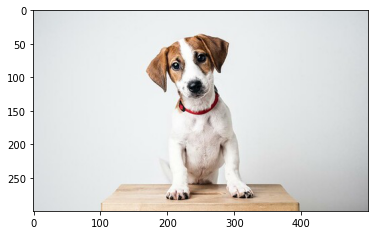

In [ ]:
# load and display an image with Matplotlib

from matplotlib import image
from matplotlib import pyplot

# load image as pixel array
#img = image.imread('perro.jpg')
img = image.imread('/content/drive/My Drive/CIA_marcos/deep_learning/clase_5/perro.jpg')
# summarize shape of the pixel array
print('La variable img es del tipo: ', type(img))
print('Los números son del tipo: ', img.dtype)
print('Sus dimensiones son: ', img.shape)

# display the array of pixels as an image
pyplot.imshow(img)
pyplot.show()

### adaptación del formato requerido para pytorch



documentacion de pytorch
torch.nn.functional
```
torch.nn.functional.conv2d(input, weight, bias=None, stride=1, padding=0, dilation=1, groups=1) → Tensor
```
**input** – input tensor of shape (batch, in_channels, iH, iW)

**weight** – filters of shape (out_channels, in_channels, kH, kW)

**bias** – optional bias tensor of shape (out_channels). Default: None

**stride** – the stride of the convolving kernel. Can be a single number or a tuple (sH, sW). Default: 1

**padding** –
implicit paddings on both sides of the input. 
Can be a string {‘valid’, ‘same’}, single number or a tuple (padH, padW). Default: 0 
padding='valid' is the same as no padding. 
padding='same' pads the input so the output has the shape as the input. 
However, this mode doesn’t support any stride values other than 1.



---
**output** - es un tensor de dimensiones (batch_size, out_channels, Hout, Wout)

size:
```
input.shape = [batch_size, n_channels_in, H_in, W_in]

output.shape = [batch_size, n_channels_out, H_out, W_out]
```
con:

$$ H\_out = \lfloor\frac{H\_in-kernel\_size+2*padding}{stride} +1 \rfloor$$

$$ W\_out = \lfloor\frac{W\_in-kernel\_size+2*padding}{stride} +1 \rfloor$$





shape tensor from numpy
torch.Size([300, 500, 3])


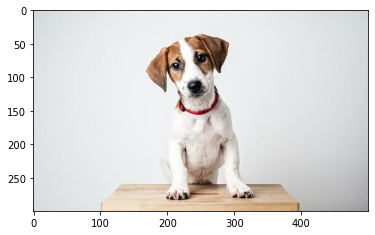

se agrega la dimension del batch size
torch.Size([1, 300, 500, 3])
vemos dtype
torch.float32
reordenamos el tensor y convertimos a float
nuevas dimensiones de tensor DESPUES agregar dim de batch, ordenar y formato de datos
tamaño_batch, nro_canales, vert_pixeles, hor_pixeles


(torch.Size([1, 3, 300, 500]), torch.float32)

In [ ]:
# convertir la imágen en tensor con dimensiones (N, C_in, H, W) (batch_size, n_chanels, height, width)
# creamos tensor
img_tensor = torch.from_numpy(img/255.).float()  # <- no hace copia
#img_tensor = torch.tensor(img)     # <- hace copia
print('shape tensor from numpy')
print(img_tensor.shape)

# veamos de tener al perrito aún con nosotros
pyplot.imshow(img_tensor)
pyplot.show()


# se agrega dimension del batch size
img_tensor = img_tensor.unsqueeze(0)                                             # IMPORTANTE
print('se agrega la dimension del batch size')
print(img_tensor.shape)

# vemos tipo de data type
print('vemos dtype')
print(img_tensor.dtype)

# reordenamos y convertimos a float
print('reordenamos el tensor y convertimos a float')
img_tensor = img_tensor.permute(0, 3, 1, 2).float()                              # IMPORTANTE

# vemos como queda todo
print('nuevas dimensiones de tensor DESPUES agregar dim de batch, ordenar y formato de datos')
print('tamaño_batch, nro_canales, vert_pixeles, hor_pixeles')
img_tensor.shape, img_tensor.dtype


In [ ]:
# generamos un kernel de dimension 3x3 y valores  de 1 (es un filtro "pasa todo"... no queremos detectar nada...)
# se agrega una escala para que el resultado siga estando acotado entre 0 y 1
# y así poder graficar la salida.

ks = 3 # kernel size
ch_out = 3
k1= torch.ones(ch_out,3,ks,ks)*torch.tensor(1/((ks*ks)*ch_out))
#k1= torch.rand(ch_out,3,ks,ks)*torch.tensor(1/((ks*ks)*ch_out))
print(k1, k1.dtype)

tensor([[[[0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370]],

         [[0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370]],

         [[0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370]]],


        [[[0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370]],

         [[0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370]],

         [[0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370]]],


        [[[0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370]],

         [[0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370]],

         [[0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370],
          [0.0370, 0.0370, 0.0370]]]]) torch

### Calculamos ahora la convolución

In [ ]:
salida = torch.nn.functional.conv2d(img_tensor, k1,stride=1, padding=0)
print('Tamaño de salida: ', salida.shape)
# elimino batch_size
salida = salida.squeeze()
print('Tamaño de salida squeeze: ', salida.shape)
dimension = salida.squeeze().dim()
if dimension >2:
  salida = salida.permute(1, 2, 0)
  print('Tamaño de salida re-ordenada: ', salida.shape)
  #salida = salida/torch.max(salida)


Tamaño de salida:  torch.Size([1, 3, 298, 498])
Tamaño de salida squeeze:  torch.Size([3, 298, 498])
Tamaño de salida re-ordenada:  torch.Size([298, 498, 3])


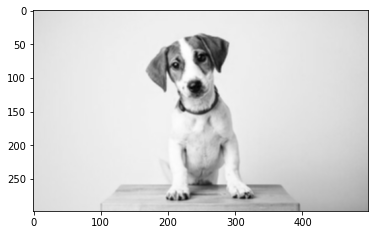

In [ ]:
# display the array of pixels as an image
pyplot.imshow(salida)
pyplot.show()


## Ejemplo capa convolución

Documentación de pytorch
torch.nn.Conv2d

```
class
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
```



**in_channels (int)** – Number of channels in the input image

**out_channels (int)** – Number of channels produced by the convolution

**kernel_size (int or tuple)** – Size of the convolving kernel

**stride (int or tuple, optional)** – Stride of the convolution. Default: 1

**padding (int, tuple or str, optional)** – Padding added to all four sides of the input. Default: 0

**padding_mode (string, optional)** – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'

**bias (bool, optional)** – If True, adds a learnable bias to the output. Default: True

### **OJO!**

size:
```
input.shape = [batch_size, n_channels_in, H_in, W_in]

output.shape = [batch_size, n_channels_out, H_out, W_out]
```
con:

$$ H\_out = \lfloor\frac{H\_in-kernel\_size+2*padding}{stride} +1 \rfloor$$

$$ W\_out = \lfloor\frac{W\_in-kernel\_size+2*padding}{stride} +1 \rfloor$$


---
**output** es un objeto , ya que ```torch.nn.Conv2d``` es una clase.



In [ ]:
# creamos 1 filtro (out_channels = 1) de tamaño 3x3
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 1, kernel_size = 3)

# con eso se creó el objeto.. ahora hay que pasarle el tensor a convolucionar...
output = conv(img_tensor)

# dimensiones: (N, #filtros, H_out, W_out)
output.shape

torch.Size([1, 1, 298, 498])

In [ ]:
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 1, kernel_size = 3, padding = 'same', stride = 1)

output = conv(img_tensor)

# dimensiones: (N, #filtros, H_out, W_out)
output.shape

torch.Size([1, 1, 300, 500])

In [ ]:
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 1, kernel_size = 85, padding = 1, stride = 1)

output = conv(img_tensor)

# dimensiones: (N, #filtros, H_out, W_out)
output.shape

torch.Size([1, 1, 218, 418])

### Convolución padding y stride
`padding` controls the amount of padding applied to the input. It can be either a string **{‘valid’, ‘same’}** or **a tuple of ints** giving the amount of implicit padding applied on both sides.

`stride`  controls the stride for the cross-correlation, a **single number or a tuple**.




In [ ]:
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = 3, padding = 1)
output = conv(img_tensor)
# dimensiones: (N, #filtros, H_out, W_out)
output.shape

torch.Size([1, 3, 300, 500])

In [ ]:
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = 3, padding = 1, stride = 2)

output = conv(img_tensor)

# dimensiones: (N, #filtros, H_out, W_out)
output.shape

torch.Size([1, 3, 150, 250])

# Pooling

Tambien está definida una funcion `torch.nn.functional.max_pool2d` o una clase `torch.nn.MaxPoll2d` (y otras pooling functions). Vamos ver la clase directamente.

De la documentación tenemos


```
class
torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
```
Parámetros


**kernel_size** – the size of the window to take a max over

**stride** – the stride of the window. **Default value is kernel_size**

**padding** – implicit zero padding to be added on both sides

**dilation** – a parameter that controls the stride of elements in the window

**return_indices** – if True, will return the max indices along with the outputs. Useful for torch.nn.MaxUnpool2d later

**ceil_mode** – when True, will use ceil instead of floor to compute the output shape


---



**output** es un objeto , ya que ```torch.nn.MaxPool2d``` es una clase.


In [ ]:
# creo el objeto (capa) de pooling
pool = torch.nn.MaxPool2d(10, padding=0)                             # ver: stride, otras pooling functions
pool = torch.nn.MaxPool2d(10, padding=0, stride=10)
pool = torch.nn.MaxPool2d(10, padding=0, stride=5)
pool = torch.nn.AvgPool2d(5, padding=0, stride=5)

# le paso una imagen (el perrito!)
output = pool(img_tensor)
output.shape

torch.Size([1, 3, 60, 100])

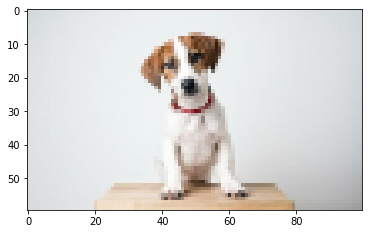

In [ ]:
plt.imshow(output.squeeze(0).permute(1,2,0))
plt.show()


#**MNIST data base**
# ejemplo de red neuronal de convolución (CNN)

Vamos a usar la base de datos de MNIST ([ver fuente](http://yann.lecun.com/exdb/mnist/)) para entrenar una CNN que identifique números escritos a mano.

Para esto necesitamos:


1.   Cargar la base de datos
2.   Ver que la base de datos esté ok
3.   Construir nuestra CNN
4. Ver que las dimensiones de la red sean consistentes
4.   Definir funciones necesarias (de entrenamiento, de costo, etc.)
5. Entrenar la red
6. Ver que funcione
7. ... sorpresa nro 1
8. ... sorpresa nro 2 



1. Cargar base de datos

In [3]:
# primero el dataset
train_dataset = torchvision.datasets.MNIST('../data', train=True, download=True,
                       transform=torchvision.transforms.Compose([
                            torchvision.transforms.ToTensor(),#<------------------- esto es GLORIOSO!!
                            torchvision.transforms.Normalize((0.1307,), (0.3081,))
                            ])
                      )

test_dataset = torchvision.datasets.MNIST('../data', train=False,
                   transform=torchvision.transforms.Compose([
                        torchvision.transforms.ToTensor(), #<------------------- esto es GLORIOSO!!
                        torchvision.transforms.Normalize((0.1307,), (0.3081,))
                        ])
                     )

# ahora el dataloader
dataloader = {
    'train': torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, pin_memory=True)
}

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



2. Ver que la base de datos esté OK

In [ ]:
print(type(dataloader))
print(type(dataloader['train']))

<class 'dict'>
<class 'torch.utils.data.dataloader.DataLoader'>


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
tamaño de 1 imagen:  torch.Size([1, 28, 28])
tamaño 1 imagen DESPUES de squeeze:  torch.Size([28, 28])


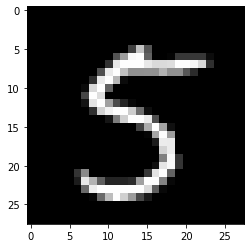

Label: 5


In [ ]:
# Display image and label from dataloader (un herramienta para hacre batches de datasets)
train_features, train_labels = next(iter(dataloader['train']))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0]
print('tamaño de 1 imagen: ', img.shape)
# le QUITO 1 dimension (la del tamaño del batch) para poder graficar
img = train_features[0].squeeze()
print('tamaño 1 imagen DESPUES de squeeze: ', img.shape)
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

3. Construyo mi CNN

In [8]:
# defino primero un "bloque" de una capa CNN
def block(c_in, c_out, k=3, p=1, s=1, pk=2, ps=2):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s), # conv
        torch.nn.ReLU(),                                      # activation
        torch.nn.MaxPool2d(pk, stride=ps)                     # pooling
    )


# ahora SI construyo mi red..
class CNN(torch.nn.Module):
  def __init__(self, n_channels=1, n_outputs=10):
    super().__init__()
    self.conv1 = block(n_channels, 64)
    self.conv2 = block(64, 128)
    self.fc = torch.nn.Linear(128*7*7, n_outputs) # el 7 sale del stride 2 que tienen las 2 capas pooling
    #self.sm = torch.nn.Softmax(dim=1)
    print('Red creada')
    print('arquitectura:')
    print(self)
    # también me fijo en el número de parámetros entrenables
    pytorch_total_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
    print('Número total de parámetros a entrenar: ', pytorch_total_params)

  def forward(self, x):
    print("Validar dimensiones:")
    print("Entrada: ", x.shape)
    x = self.conv1(x)
    print("conv1: ", x.shape)
    x = self.conv2(x)
    print("conv2: ", x.shape)
    x = x.view(x.shape[0], -1)
    print("imagen vectorizada: ", x.shape)
    x = self.fc(x)
    print("fc: ", x.shape)
   # x = self.sm(x)
    #print("Salida: ", x.shape)
    return x

In [ ]:
model = CNN()


Red creada
arquitectura:
CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=6272, out_features=10, bias=True)
)
Número total de parámetros a entrenar:  137226


4. Veamos que las dimensiones sean consistentes.

In [ ]:
output = model(torch.randn(1, 1, 28, 28))


Validar dimensiones:
Entrada:  torch.Size([1, 1, 28, 28])
conv1:  torch.Size([1, 64, 14, 14])
conv2:  torch.Size([1, 128, 7, 7])
imagen vectorizada:  torch.Size([1, 6272])
fc:  torch.Size([1, 10])


Vuelvo a definir mi red para que en cada `forward` no me imprima los tamaños de la salida

In [55]:
class CNN(torch.nn.Module):
  def __init__(self, n_channels=1, n_outputs=10):
    super().__init__()
    self.conv1 = block(n_channels, 36)
    self.conv2 = block(36, 128)
    self.conv3 = block(128, 256)
    self.fc = torch.nn.Linear(256*3*3, n_outputs) # el 7 sale del stride 2 que tienen las 2 capas pooling
    self.sm = torch.nn.Softmax(dim=1)


  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    x = self.sm(x)
    return x

5. Armo las funciones necesarias

In [28]:
from tqdm import tqdm # <- para graficar la barra de avance


def fit(model, dataloader, epochs=5):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            ####
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")
        

In [56]:
model = CNN()

5. Entreno la red

In [57]:
fit(model, dataloader)

val_loss 1.57799 val_acc 0.88227: 100%|██████████| 157/157 [00:04<00:00, 35.87it/s]


Epoch 1/5 loss 1.59863 val_loss 1.57799 acc 0.86326 val_acc 0.88227


val_loss 1.56877 val_acc 0.89142: 100%|██████████| 157/157 [00:04<00:00, 36.02it/s]


Epoch 2/5 loss 1.57267 val_loss 1.56877 acc 0.88763 val_acc 0.89142


val_loss 1.56860 val_acc 0.89232: 100%|██████████| 157/157 [00:04<00:00, 35.99it/s]


Epoch 3/5 loss 1.56986 val_loss 1.56860 acc 0.89043 val_acc 0.89232


val_loss 1.48115 val_acc 0.98000: 100%|██████████| 157/157 [00:04<00:00, 35.61it/s]


Epoch 4/5 loss 1.48648 val_loss 1.48115 acc 0.97468 val_acc 0.98000


val_loss 1.47494 val_acc 0.98637: 100%|██████████| 157/157 [00:04<00:00, 36.33it/s]

Epoch 5/5 loss 1.47724 val_loss 1.47494 acc 0.98376 val_acc 0.98637


6. Vemos que funcione.

torch.Size([1, 28, 28])


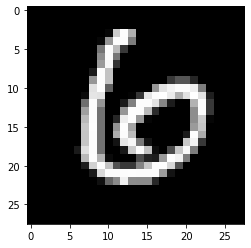

torch.Size([1, 1, 28, 28])
tensor([[2.2480e-36, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.1084e-44,
         1.0000e+00, 0.0000e+00, 6.7859e-31, 0.0000e+00]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
tensor([[0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.2320, 0.0853, 0.0853,
         0.0853]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
El numero es un:  6


In [59]:
# corremos 1 dato, a ver como lo clasifica...
test_features, test_labels = next(iter(dataloader['test']))

k = 11

algo = test_features[k]
print(algo.shape)
plt.imshow(algo.squeeze(), cmap='gray')
plt.show()

algo = algo.unsqueeze(0) # agrego la batch dim
print(algo.shape)
algo = algo.to(device)

y_hat = model(algo)
print(y_hat)
print(torch.nn.functional.softmax(y_hat, dim=1))
print(f'El numero es un: ', torch.argmax(y_hat, axis=1).item())


## 7. SORPRESA NRO 1

## Probemos con un número nuestro!
Primero lo dibujamos en el paint con un tamaño próximo a 28x28 pixeles
(el tamaño del papel puede ser aproximado)...
Después haremos un `resize`.
Tratar de usar un marcador grueso!!!!

Cargamos el archivo hecho a mano

In [62]:
from google.colab import files
files.upload()

Saving tres.png to tres.png


{'tres.png': b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00>\x00\x00\x00A\x08\x02\x00\x00\x00\x06\xd7\x80\x07\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x01\xcaIDAThC\xed\x98A\xae\x84 \x0c\x86\x8d\x0b\xe3\xd2\xa5\xcb\x17O\xe7M<\x86\xc7\xf0x\xf3\x98\xc7\x1bB\x00\x19\xda\xbf`H\xearB\x87\xaf\x1f\x15\x8a\xc3\xab\xdbg\xe8\x96\xfc\xa5\xe8O\xac\x9dZW\xeb$\x03Z0$]B\x83\xd5\xba\x90H\xd2\xdfHZ\xbf\xae\xeb\xe7\xef9\xcf\x93\x04\xc1\x1b\x8c\xa2[\xdc\xe1\xe6\xa9\x9a\x06\x1f=\x0f\xed\xe72MS\x8du`\xa2\x1b\xeeeY\xeed'\x7f\x17_\x01\x0ez\xcc\xbd\xef{\\\xaf\xc7q\x049\xcc\xf3,\xa8\x9f\x8c\x1ep'\xa1\xfd4\x82\x04\x04\xe9\xc9\xe8\xeb\xba:\x97_\xb9]\x0e~\x02\x86\x9e\xb7\xa5\x04Qdt3\xb1E/\xe7\xb6S\xfa\xf4\xcf\xa0[\x02*\xb7eu\xcb\xf5\x0c:{V\xf3\x92\xf4\x87\x1e\x9f\x00\xec\xfc\xfd@r\xad\x93fM\x1e[\xbcb\x8b\xe7\xad\x85~w\xd6Jq\xbf\xdf\x1c\x92\xc5\x92\xc1\r\xa0\xff_\xfa\x12\x9a\x921\x99\x96F\xd0\

In [70]:
# desde colab

from google.colab import drive
drive.mount("/content/drive")



Mounted at /content/drive


In [71]:
#foto = torchvision.io.read_image('tres.png')
foto= torchvision.io.read_image('/content/drive/My Drive/CIA_marcos/deep_learning/clase_5/tres.png')

Veamos el tamaño, datatype, etc.

In [40]:
print(foto.shape)
print(foto.dtype)

torch.Size([3, 65, 62])
torch.uint8


In [72]:
foto = foto.float()
print(foto.dtype)

torch.float32


Apliquemos algunas transformaciones para llevarlo al tamaño deseado

In [ ]:
f2 = torchvision.transforms.Resize(size=(28,28))(foto)
print(f2.shape)

torch.Size([3, 28, 28])


In [ ]:
f3 = torchvision.transforms.Grayscale(num_output_channels=1)(f2)
print(f3.shape)


torch.Size([1, 28, 28])


Podemos colocar todas las transformaciones juntas con `.transforms.Compose`

In [73]:
adaptacion = torchvision.transforms.Compose([
                                             torchvision.transforms.Resize(size=(28,28)),
                                             torchvision.transforms.Grayscale(num_output_channels=1),
                                             torchvision.transforms.Normalize((0.1307,), (0.3081,)), #<---------- IMPORTANTE!
                                                             ])

In [74]:
f4 = adaptacion(foto)
print(f4.shape)
f4 = torchvision.transforms.functional.invert(f4)

torch.Size([1, 28, 28])


Veamos como quedó

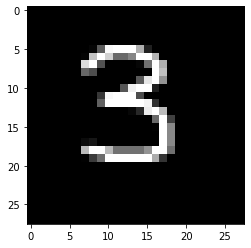

In [75]:
plt.imshow(f4.squeeze(), cmap='gray')
plt.show()

Lo pasamos por la red...
RECORDAR ENVIARLO A `DEVICE`

In [76]:
y_hat = model(f4.unsqueeze(0).to(device))
print(y_hat)
print(torch.nn.functional.softmax(y_hat, dim=1))
print(f'El numero es un: ', torch.argmax(y_hat, axis=1).item())

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
tensor([[0.0853, 0.0853, 0.0853, 0.2320, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853,
         0.0853]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
El numero es un:  3


## 8. SORPRESA NÚMERO 2

Vamos a armar una competición en el curso.
El objetivo es armar una arquitectura de CNN que identifique el dataset MNIST.
Se van a usar capas de convolución, de activación y de pooling a elección. Cada alumno eligirá si modelo, lo entrenará y presentará los siguientes resultados:

*   test_acc
*   n_parameter
*   n_layers (conv + activacion + pooling = 1 capa)
*   n_epochs


El modelo se deberá ajustar a los siguientes parámetros:

*   train: 80%, validation: 10%, test: 10% (los datos serán dados, no los tienen que bajar, así todos usan el mismo set para cada grupo).
*   capa final de salida será una softmax de 10 elementos.
*   coss_function será `CrossEntropyLoss`.

El ganador de la competencia será aquel que consiga el mayor `score` empleando la siguietne fórmula:

$$ score = \frac{1}{log_{10}(n\_parameter)} * \frac{10}{n\_epochs}*test\_acc*n\_layers$$







